Credit fraud detection datasets

In [141]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn import tree
import matplotlib.pyplot as plt 
#from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

1. Load and prepare data 

In [4]:
# Standardize for upcoming PCA 
scale = StandardScaler()
data = pd.DataFrame(pd.read_csv("creditcard.csv"))
# Drop irrelevant columns
scale.fit(data.drop("Amount", axis=1).drop("Class", axis=1).drop("Time", axis=1))
# Split into X and y 
X = pd.DataFrame(scale.transform(data.drop("Amount", axis=1).drop("Class", axis=1).drop("Time", axis=1)))
y = data["Class"]
# The dataset is partly preprocessed and has no missing values, therefor we don't have to fill or drop NA's

2. Feature selction with PCA 

In [86]:
n_components = X.shape[1]
pca = PCA(n_components=n_components, random_state=0)
pca.fit(X)
data_red = pd.DataFrame(pca.transform(X))
total_var = sum(pca.explained_variance_)
var_95 = total_var*.95

print("Our total explained variance: ", total_var)
print("95% of our explained variance: ", var_95)

a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["Principal components", "Explained variance"])

print("Explained variance of 10 components: ", sum(a["Explained variance"][0:9]))
print("Explained variance of 15 components: ", sum(a["Explained variance"][0:14]))
print("Explained variance of 20 components: ", sum(a["Explained variance"][0:19]))
print("Explained variance of 25 components: ", sum(a["Explained variance"][0:24]))
print("Explained variance of 27 components: ", sum(a["Explained variance"][0:26]))
print("Explained variance of 28 components: ", sum(a["Explained variance"][0:27]))

Our total explained variance:  28.000098312535552
95% of our explained variance:  26.600093396908772
Explained variance of 10 components:  9.000031600457891
Explained variance of 15 components:  14.000049156267808
Explained variance of 20 components:  19.000066712077732
Explained variance of 25 components:  24.000084267887647
Explained variance of 27 components:  26.00009129021161
Explained variance of 28 components:  27.00009480137359


The dimensions seem to be reduced allready. 95% of the variance is only explained by 27 components. We continue with the original data set. 

3. Split the data in train and test data 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

0    93829
1      158
Name: Class, dtype: int64

4. Logistic regression classification

y_test value counts:  0    93829
1      158
Name: Class, dtype: int64
y_pred value counts:  0    93881
1      106
dtype: int64
f1 score:  0.6969696969696969
blanaced acc:  0.7910646367057983
precision:  0.8679245283018868


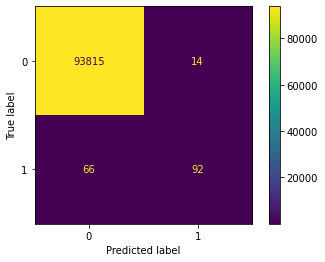

In [82]:
# Train and fit the model 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = pd.DataFrame(lr.predict(X_test))

# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred.value_counts())
print("f1 score: ", metrics.f1_score(y_test, y_pred))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred))
print("precision: ", metrics.precision_score(y_test, y_pred))

plot_confusion_matrix(lr, X_test, y_test)
plt.show()

4.1 adding classweight to improve the result 

y_test value counts:  0    93829
1      158
Name: Class, dtype: int64
y_pred value counts:  0    93827
1      160
dtype: int64
f1 score:  0.8050314465408804
balanced acc:  0.9048927681665988
precision:  0.8


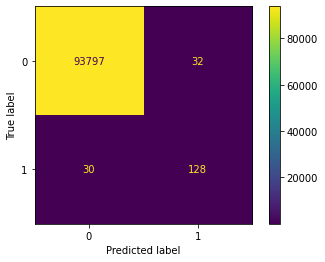

In [157]:
class_weight = {
    0: .1,
    1: .9
} 

# Train and fit the model 
lr_weighted = LogisticRegression(class_weight=class_weight)
lr_weighted.fit(X_train, y_train)
y_pred_weighted = pd.DataFrame(lr_weighted.predict(X_test))

# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_weighted.value_counts())
print("f1 score: ", metrics.f1_score(y_test, y_pred_weighted))
print("balanced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_weighted))
print("precision: ", metrics.precision_score(y_test, y_pred_weighted))

plot_confusion_matrix(lr_weighted, X_test, y_test)
plt.show()

With class weighting, we were able to improve the fscore by 11% and the number of correct predicted objects by over 30% and reduce the incorrect predicted by half. 
The weighted logistic regression thus represents a good model. Nevertheless, we will test and evaluate further classification algorithms. Furthermore, there is of course the risk of overfitting, which still needs to be tested. 

In [ ]:
######## muss noch auf overfitting testen !!!!! 

5. Decision tree classification 

y_test value counts:  0    93829
1      158
Name: Class, dtype: int64
y_pred value counts:  0    93828
1      159
dtype: int64
f1 score:  0.7570977917981073
blanaced acc:  0.8795390105701308
precision:  0.7547169811320755
depth of the decision tree:  28
Leafes in the decision tree:  144


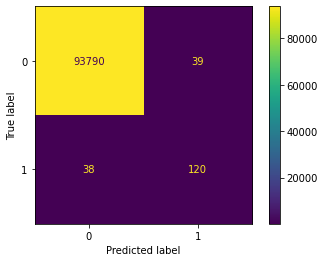

In [110]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = pd.DataFrame(dtc.predict(X_test))

# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_dtc.value_counts())
print("f1 score: ", metrics.f1_score(y_test, y_pred_dtc))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_dtc))
print("precision: ", metrics.precision_score(y_test, y_pred_dtc))

# 
depth = dtc.get_depth()
leaves = dtc.get_n_leaves()
print("depth of the decision tree: ", depth)
print("Leafes in the decision tree: ", leaves)

plot_confusion_matrix(dtc, X_test, y_test)
plt.show()

#tree.plot_tree(dtc)

5.1 Adding class weights and prune the tree to avoid overfitting 

y_test value counts:  0    93829
1      158
Name: Class, dtype: int64
y_pred value counts:  0    93808
1      179
dtype: int64
f1 score on test data :  0.7833827893175075
blanaced acc:  0.9174710633712743
precision:  0.7374301675977654


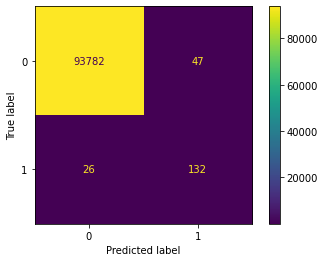

[Text(618.2386363636364, 733.86, 'X[13] <= -3.848\nentropy = 0.116\nsamples = 190820\nvalue = [19048.6, 300.6]'),
 Text(317.0454545454545, 570.78, 'X[9] <= -1.703\nentropy = 0.631\nsamples = 715\nvalue = [45.0, 238.5]'),
 Text(190.22727272727272, 407.70000000000005, 'X[15] <= 3.143\nentropy = 0.167\nsamples = 312\nvalue = [5.8, 228.6]'),
 Text(126.81818181818181, 244.62, 'X[25] <= -0.232\nentropy = 0.147\nsamples = 303\nvalue = [4.9, 228.6]'),
 Text(63.40909090909091, 81.54000000000008, 'entropy = 0.295\nsamples = 130\nvalue = [4.3, 78.3]'),
 Text(190.22727272727272, 81.54000000000008, 'entropy = 0.037\nsamples = 173\nvalue = [0.6, 150.3]'),
 Text(253.63636363636363, 244.62, 'entropy = -0.0\nsamples = 9\nvalue = [0.9, 0.0]'),
 Text(443.8636363636364, 407.70000000000005, 'X[6] <= 0.856\nentropy = 0.725\nsamples = 403\nvalue = [39.2, 9.9]'),
 Text(380.45454545454544, 244.62, 'X[14] <= 0.699\nentropy = 0.998\nsamples = 122\nvalue = [11.1, 9.9]'),
 Text(317.0454545454545, 81.54000000000008

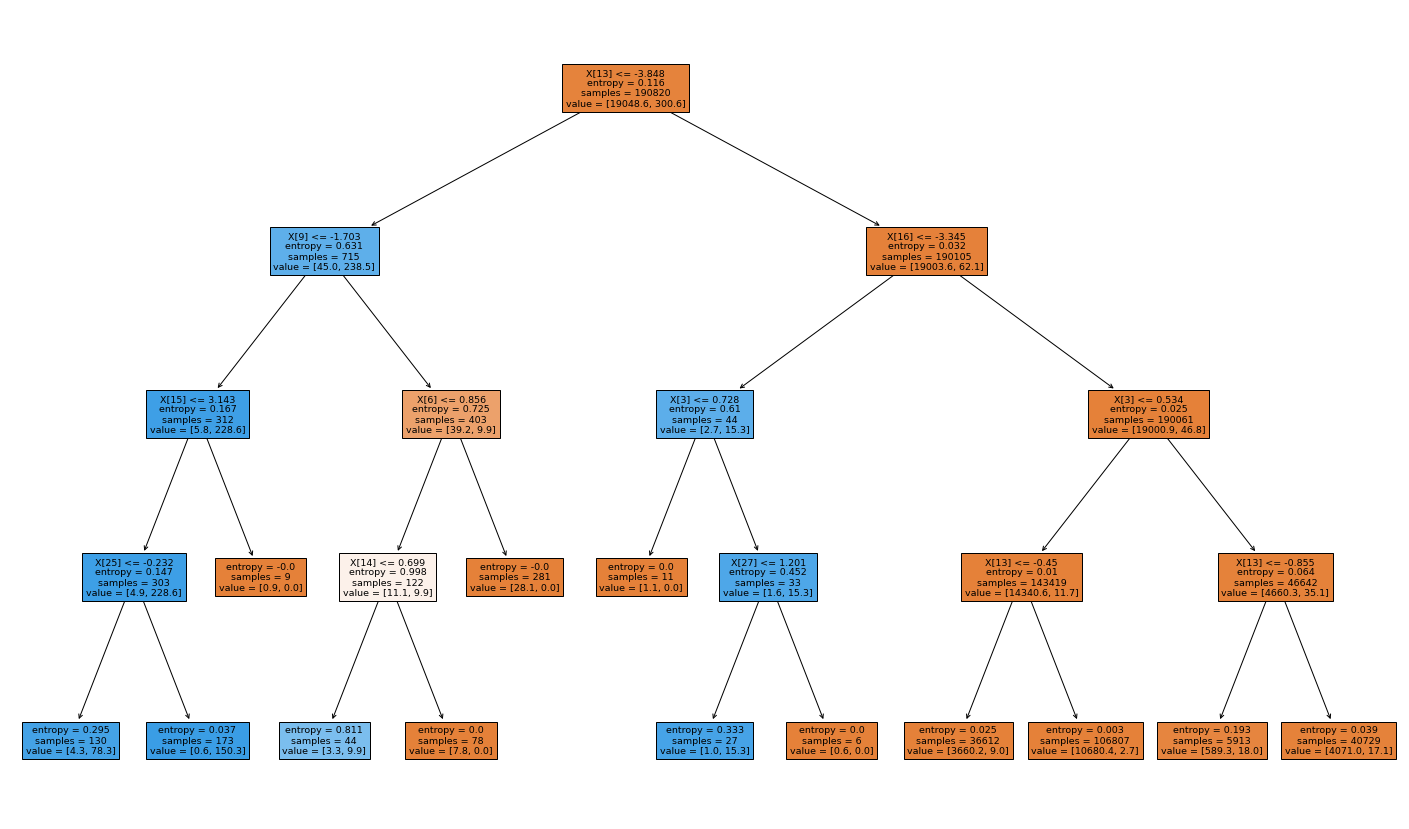

In [144]:
class_weight_dtc = {
    0: .1,
    1: .9
}

# Train and fit model 
dtc_weighted = tree.DecisionTreeClassifier(criterion="entropy", class_weight=class_weight_dtc, max_depth=4, max_leaf_nodes=20)
dtc_weighted.fit(X_train, y_train)
y_pred_dtc_w = pd.DataFrame(dtc_weighted.predict(X_test))

# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_dtc_w.value_counts())
print("f1 score on test data : ", metrics.f1_score(y_test, y_pred_dtc_w))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_dtc_w))
print("precision: ", metrics.precision_score(y_test, y_pred_dtc_w))

plot_confusion_matrix(dtc_weighted, X_test, y_test)
plt.show()

plt.figure(figsize=(25,15))
tree.plot_tree(dtc_weighted, filled=True)


6. Random forest classification

In [147]:
rfc = RandomForestClassifier(criterion="entropy")
rfc.fit(X_train, y_train)
y_pred_rfc = pd.DataFrame(rfc.predict(X_test))

In [159]:
# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_rfc.value_counts())
print("f1 score on test data : ", metrics.f1_score(y_test, y_pred_rfc))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_rfc))
print("precision: ", metrics.precision_score(y_test, y_pred_rfc))

y_test value counts:  0    93829
1      158
Name: Class, dtype: int64
y_pred value counts:  0    93852
1      135
dtype: int64
f1 score on test data :  0.8737201365187713
blanaced acc:  0.9050259892389751
precision:  0.9481481481481482


In [156]:
rfc_weighted = RandomForestClassifier(class_weight=class_weight, max_depth=5, max_leaf_nodes=20)
rfc_weighted.fit(X_train, y_train)
y_pred_rfc_w = pd.DataFrame(rfc.predict(X_test))

y_test value counts:  0    93829
1      158
Name: Class, dtype: int64
y_pred value counts:  0    93852
1      135
dtype: int64
f1 score on test data :  0.8737201365187713
blanaced acc:  0.9050259892389751
precision:  0.9481481481481482


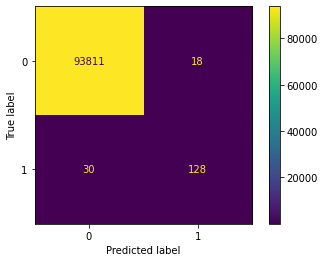

In [158]:
# Evaluate the model
print("y_test value counts: ", y_test.value_counts())
print("y_pred value counts: ", y_pred_rfc_w.value_counts())
print("f1 score on test data : ", metrics.f1_score(y_test, y_pred_rfc_w))
print("blanaced acc: ", metrics.balanced_accuracy_score(y_test, y_pred_rfc_w))
print("precision: ", metrics.precision_score(y_test, y_pred_rfc_w))

plot_confusion_matrix(rfc_weighted, X_test, y_test)
plt.show()